In [1]:
import tensorflow as tf
import numpy as np

In [2]:
tf.set_random_seed(777)

In [3]:
xy = np.loadtxt('data-01-test-score.csv', delimiter = ',', dtype = np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [4]:
print(x_data, "\nx_data type : ", x_data.shape)
print(y_data, "\ny_data type : ", y_data.shape)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 
x_data type :  (25, 3)
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]] 
y_data type :  (25, 1)


In [5]:
X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])

In [6]:
W = tf.Variable(tf.random_normal([3, 1]), name = 'Weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

In [7]:
hypothesis = tf.matmul(X, W) + b

In [8]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [11]:
Cost_val = []
Steps = []

In [12]:
for step in range(2001):
    cost_val, hy_val, val = sess.run([cost, hypothesis, train], feed_dict = {X : x_data, Y : y_data})
    Steps.append(step)
    Cost_val.append(cost_val)
    if step % 10 == 0:
        print(step, "Cost : ", cost_val, "\nPrediction : \n", hy_val)

0 Cost :  21027.0 
Prediction : 
 [[22.048063 ]
 [21.619787 ]
 [24.096693 ]
 [22.29302  ]
 [18.633902 ]
 [ 7.266981 ]
 [12.3310375]
 [ 3.150511 ]
 [14.347944 ]
 [ 4.2534237]
 [14.485716 ]
 [10.678068 ]
 [28.80464  ]
 [29.298803 ]
 [11.237844 ]
 [18.646544 ]
 [31.189459 ]
 [13.344664 ]
 [28.841742 ]
 [25.66281  ]
 [15.084761 ]
 [16.798376 ]
 [15.924551 ]
 [31.36112  ]
 [24.986364 ]]
10 Cost :  95.976364 
Prediction : 
 [[157.11061]
 [183.99283]
 [184.06302]
 [196.52916]
 [142.46275]
 [ 98.59757]
 [142.77238]
 [ 99.8778 ]
 [166.13174]
 [144.8915 ]
 [140.14996]
 [134.6114 ]
 [194.05148]
 [166.64041]
 [142.28706]
 [183.433  ]
 [161.97668]
 [169.89072]
 [186.37148]
 [166.61378]
 [168.04633]
 [169.14368]
 [161.75206]
 [167.48862]
 [193.25116]]
20 Cost :  94.25726 
Prediction : 
 [[158.01505]
 [185.11974]
 [185.15114]
 [197.73495]
 [143.315  ]
 [ 99.26259]
 [143.69463]
 [100.58784]
 [167.21953]
 [145.94849]
 [141.02908]
 [135.50375]
 [195.15508]
 [167.5308 ]
 [143.22182]
 [184.59265]
 [162.81

In [13]:
import matplotlib.pyplot as plt

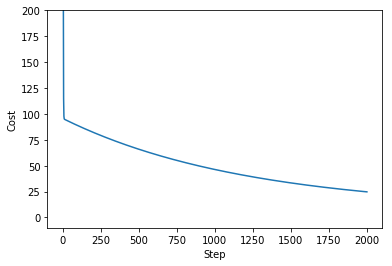

In [15]:
plt.plot(Steps, Cost_val)
plt.ylabel('Cost')
plt.xlabel('Step')
plt.ylim(-10, 200)
plt.show()

In [16]:
print("Your score will be ", sess.run(hypothesis, feed_dict = {X : [[100, 70, 101]]}))

Your score will be  [[181.73277]]


In [17]:
print("Other score will be ", sess.run(hypothesis, feed_dict = {X : [[60, 70, 110], [90, 100, 80]]}))

Other score will be  [[145.86266]
 [187.2313 ]]
